<a href="https://colab.research.google.com/github/shanksghub/bitcoin/blob/master/LTSM%20GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

url = 'https://raw.githubusercontent.com/shanksghub/bitcoin/master/convertcsv.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

a= df.drop(columns=['Date'])

Using TensorFlow backend.


In [3]:
df = df[['Close']]


dataset = df.values
dataset = dataset.astype('float32')

dataset


array([[11358.662 ],
       [12156.513 ],
       [12573.8125],
       ...,
       [  139.    ],
       [  144.54  ],
       [  134.21  ]], dtype=float32)

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [5]:
dataset


array([[0.58110297],
       [0.62216794],
       [0.6436462 ],
       ...,
       [0.00363215],
       [0.00391729],
       [0.00338561]], dtype=float32)

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

1515 747


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [0]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [9]:
trainX


array([[0.58110297, 0.62216794, 0.6436462 , ..., 0.57373124, 0.6121189 ,
        0.5524352 ],
       [0.62216794, 0.6436462 , 0.62883043, ..., 0.6121189 , 0.5524352 ,
        0.5411869 ],
       [0.6436462 , 0.62883043, 0.5858477 , ..., 0.5524352 , 0.5411869 ,
        0.55323184],
       ...,
       [0.00868111, 0.00869717, 0.00869073, ..., 0.00884849, 0.00859093,
        0.00852269],
       [0.00869717, 0.00869073, 0.00868214, ..., 0.00859093, 0.00852269,
        0.00841609],
       [0.00869073, 0.00868214, 0.00868183, ..., 0.00852269, 0.00841609,
        0.00847688]], dtype=float32)

In [10]:
trainY

array([0.5411869 , 0.55323184, 0.61202115, ..., 0.00841609, 0.00847688,
       0.00866598], dtype=float32)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 10)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

W0805 11:03:08.608959 139992483530624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 11:03:08.653751 139992483530624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 11:03:08.664129 139992483530624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 11:03:08.916340 139992483530624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 11:03:09.166037 139992483530624 deprecation.py:323

Epoch 1/100
 - 1s - loss: 0.0526
Epoch 2/100
 - 0s - loss: 0.0435
Epoch 3/100
 - 0s - loss: 0.0351
Epoch 4/100
 - 0s - loss: 0.0282
Epoch 5/100
 - 0s - loss: 0.0225
Epoch 6/100
 - 0s - loss: 0.0176
Epoch 7/100
 - 0s - loss: 0.0140
Epoch 8/100
 - 0s - loss: 0.0110
Epoch 9/100
 - 0s - loss: 0.0090
Epoch 10/100
 - 0s - loss: 0.0074
Epoch 11/100
 - 0s - loss: 0.0063
Epoch 12/100
 - 0s - loss: 0.0055
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0044
Epoch 15/100
 - 0s - loss: 0.0040
Epoch 16/100
 - 0s - loss: 0.0037
Epoch 17/100
 - 0s - loss: 0.0034
Epoch 18/100
 - 0s - loss: 0.0031
Epoch 19/100
 - 0s - loss: 0.0029
Epoch 20/100
 - 0s - loss: 0.0026
Epoch 21/100
 - 0s - loss: 0.0024
Epoch 22/100
 - 0s - loss: 0.0022
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0019
Epoch 25/100
 - 0s - loss: 0.0018
Epoch 26/100
 - 0s - loss: 0.0017
Epoch 27/100
 - 0s - loss: 0.0016
Epoch 28/100
 - 0s - loss: 0.0015
Epoch 29/100
 - 0s - loss: 0.0015
Epoch 30/100
 - 0s - lo

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 574.63 RMSE
Test Score: 104.91 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

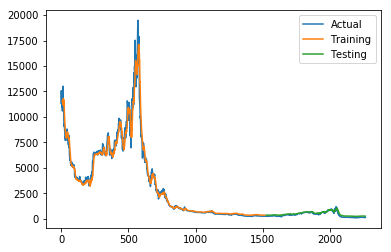

In [18]:
plt.plot(df['Close'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()